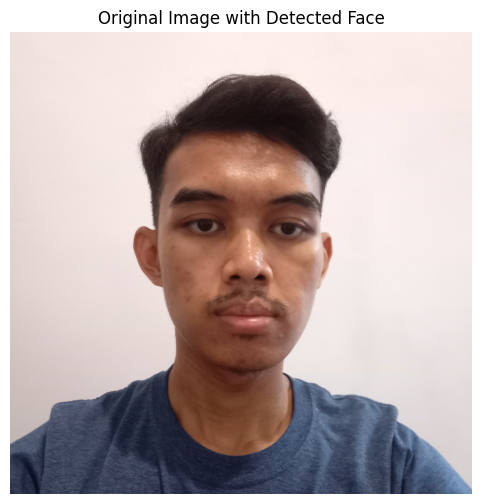

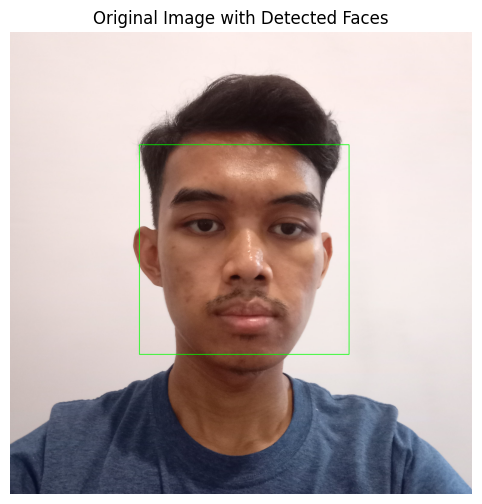

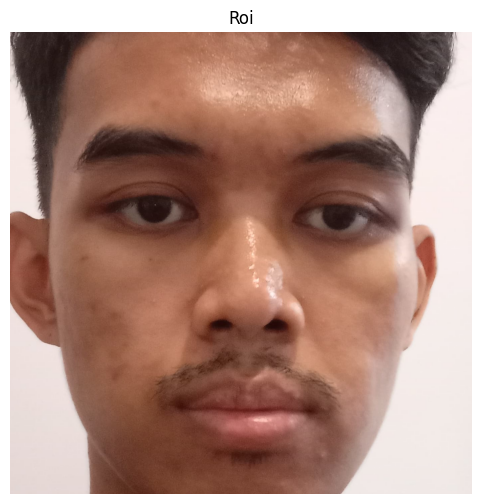

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# Load the input image
img_path = '../dataset_CV/mahfud/IMG-20231101-WA0001.jpg'
img = cv2.imread(img_path)

# Convert the image to grayscale (required for face detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the image using the face_cascade
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)

# Show the original image with the detected face
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Face')
plt.axis('off')
plt.show()

# Draw bounding boxes around the detected faces and display the image
for (x, y, w, h) in faces:
    # Draw a rectangle around the detected face
    cv2.rectangle(img, (x-5, y-5), (x + w+5, y + h+5), (0, 255, 0), 4) #beri rectangle dan beri overlap sebesar 5
    face_roi = img[y:y+h, x:x+w]
    # Show the original image with the detected faces and bounding boxes

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image with Detected Faces')
    plt.axis('off')
    plt.show()
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
    plt.title('Roi')
    plt.axis('off')
    plt.show()

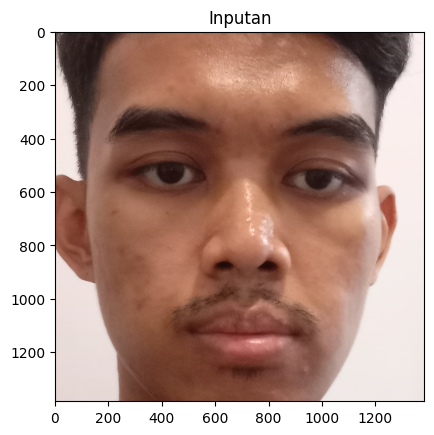

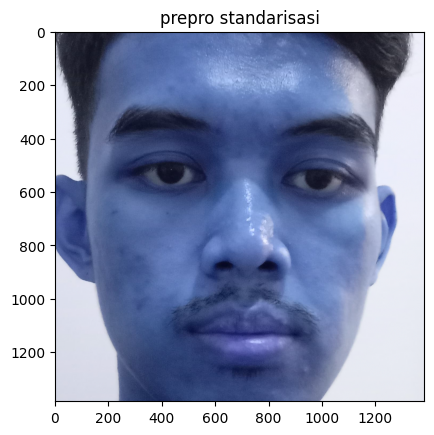

In [2]:
#image preprocessing
import cv2
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
# img=cv2.imread('../dataset/Kirei/IMG_5058.jpg') #baca file gambar dari direktori dengan menggunakan open cv
img = face_roi
#plt digunakan untuk menampilkan plot / gambar
plt.figure()
plt.title("Inputan")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #menampilkan gambar
plt.show() #menampilkan plot
convert = img/255.0
plt.figure()
plt.title("prepro standarisasi") #membuat judul pada plot
plt.imshow(convert) #menampilkan gambar
plt.show()


In [3]:
def haar(img):
    status = False
    face_roi = []
    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_roi = img[y:y+h, x:x+w]
        status = True
    return status,face_roi

In [4]:
dirname = '../dataset_CV/'
#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)
#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data= []
tampungan_label=[]
for path, subdirs, files in os.walk(dirname):
    print(path)
    for name in files:
        img_path = (os.path.join(path, name)) #baca path data
        if (img_path.endswith("jpg")): #dengan file berekstensi jpg
            img = cv2.imread(img_path) #baca gambar

            path_parts = path.split('/')
            # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
            last_word = path_parts[-1]
            #preprocessing data / segentasi boleh dilakukan disini
            status, gambar_haar = haar(img)
            if(status):
                resized=cv2.resize(gambar_haar,dim, interpolation=cv2.INTER_LINEAR) #resize
                tampungan_data.append(resized/255.0) #menumpuk gambar blur pada array tampungan dan di sampling
                tampungan_label.append(last_word)
                X = np.array(tampungan_data)
                y = np.array(tampungan_label)

../dataset_CV/
../dataset_CV/mahfud
../dataset_CV/siti
../dataset_CV/tomy


{'mahfud': 0, 'siti': 1, 'tomy': 2}


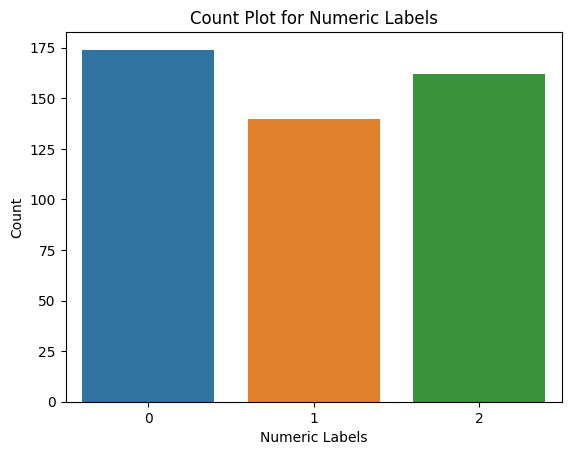

In [5]:
import seaborn as sns
list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(label_dict)
label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)
# Visualisasikan jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()
# simpan dalam file npy untuk labeling
np.save('weight/label_knn.npy', label_dict)

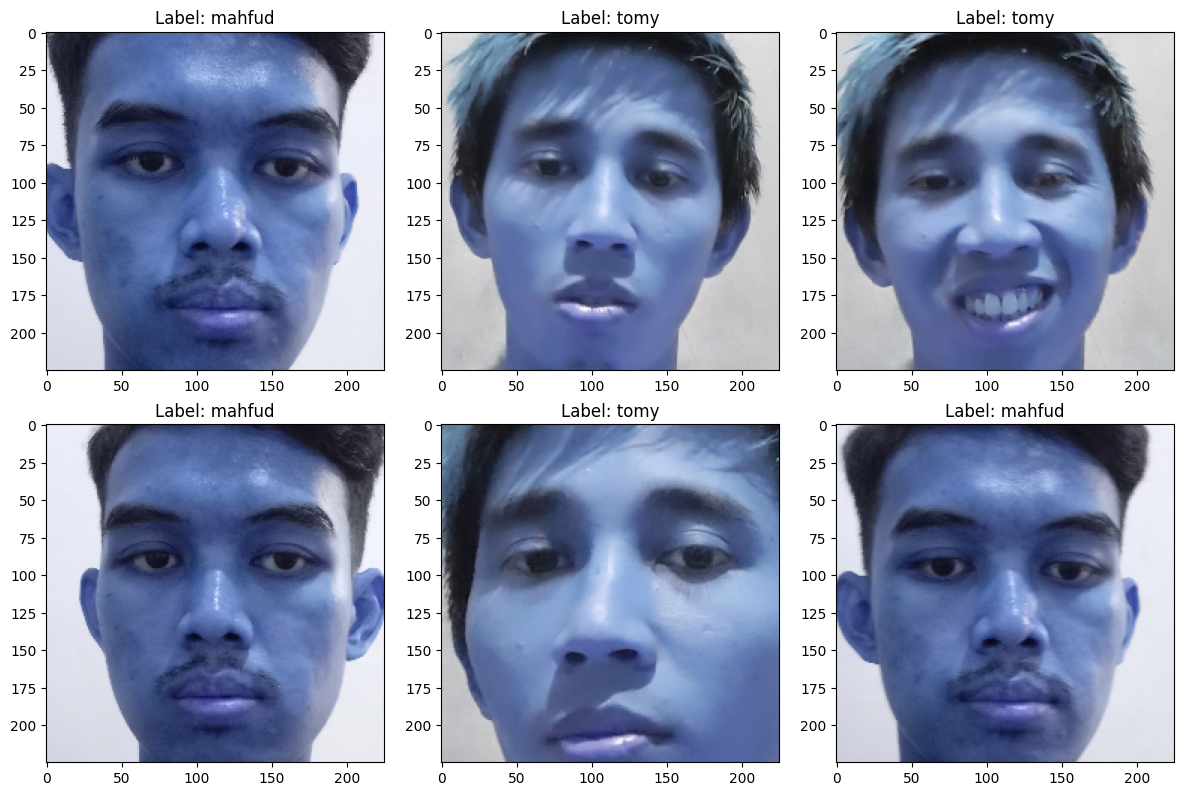

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Randomly select 6 indices from the data
random_indices = np.random.choice(len(X), 6, replace=False)
# Plot the images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(random_indices):
 plt.subplot(2, 3, i+1)
 plt.imshow(X[idx])
 plt.title("Label: " + str(y[idx]))
plt.tight_layout()
plt.show()

In [7]:
print(f"awal {X.shape}")
jml_data = X.shape[0]
h = X.shape[1]
w = X.shape[2]
d = X.shape[3]
flatten = h*w*d
#untuk shape ML itu 1 dimensi jadi X 3 dimensi harus di reshape jadi 1dimensi
X_1d = X.reshape(jml_data, flatten)
print(f"akhir {X_1d.shape}")

awal (476, 225, 225, 3)
akhir (476, 151875)


In [8]:
from sklearn.model_selection import train_test_split #library untuk train test split
#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_1d, label_numerik_array
,test_size=0.20, stratify=y)
#train size adalah persentase data test yang di-split dengan proporsi label yang sama
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

X_train: (380, 151875)
X_test: (96, 151875)
y_train: (380,)
y_test: (96,)


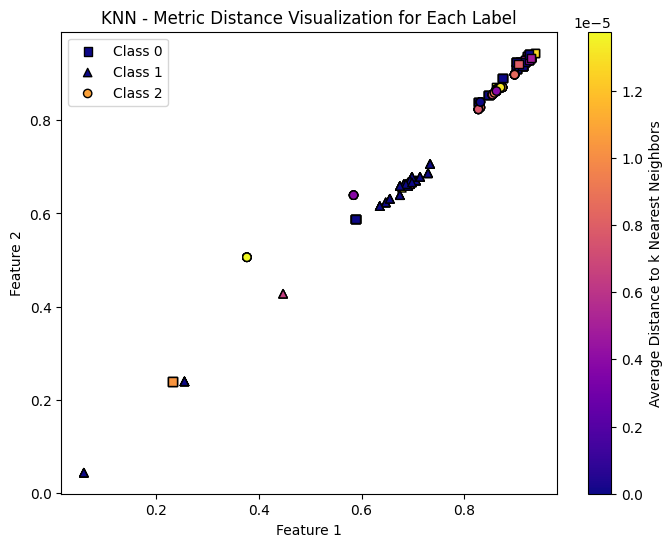

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski") #knn dengan nilai n ditentukan
model.fit(X_train,y_train) #pastikan model di "fit" = proses latih
#Visualisasi Matric Distance
# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(8, 6))
# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}
# Get the distances to the k nearest neighbors for each data point
distances, _ = model.kneighbors(X_train)
for label in np.unique(y_train):
 # Get the indices of data points belonging to the current label
 label_indices = np.where(y_train == label)[0]

 # Get the distances to the k nearest neighbors for data points of the current label
 label_distances = np.mean(distances[label_indices], axis=1)

 # Plot the distances for the current label with the corresponding marker shape
 plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])
plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()


In [10]:
y_pred = model.predict(X_test) #predict untuk memprediksi data test

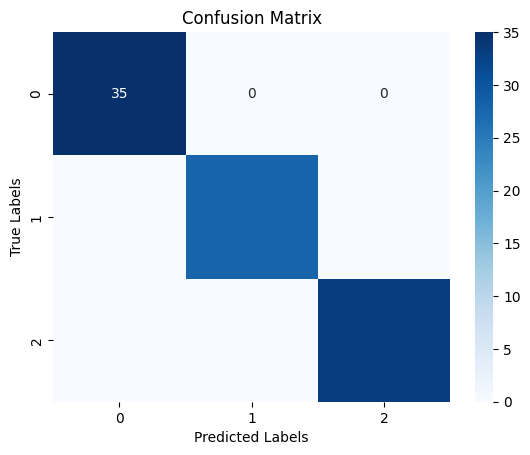

In [11]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [12]:
print(classification_report(y_test, y_pred)) #evaluasi hasil

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



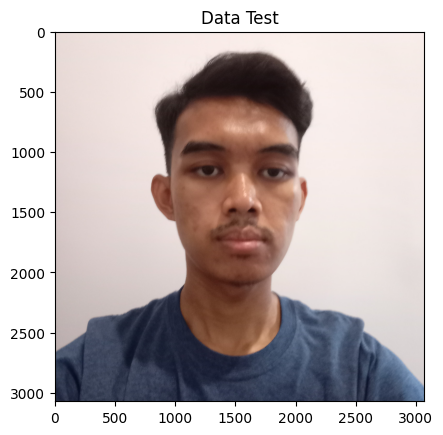

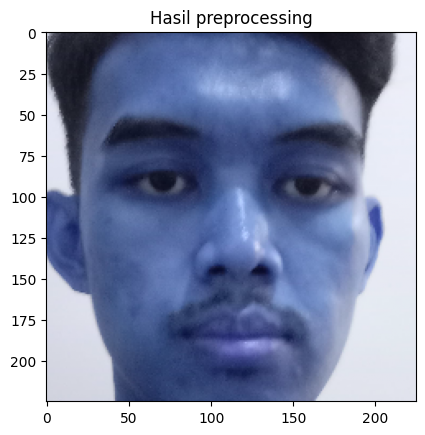

ukuran gambar test (151875,)
nilai probabilitas [[1. 0. 0.]]
mahfud = 100.0%
siti = 0.0%
tomy = 0.0%
prediksinya: ['mahfud']
The predicted image is : [0] -> ['mahfud']


In [13]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np
url= '../dataset_CV/mahfud/IMG-20231101-WA0003.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Data Test")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#pastikan langkah preprocessing yang dilakukan sama dengan data train
status,haarnya=haar(img)
convert = haarnya/255.0
img_resize = cv2.resize(convert,(225,225))
#tampilkan hasil
plt.figure()
plt.title("Hasil preprocessing")
plt.imshow(img_resize)
plt.show()

test=[img_resize.flatten()] #makukan ke list
print(f"ukuran gambar test {img_resize.flatten().shape}") #sama dengan input shape
# Mengecek hasil klasifikasi pada salah satu dataset
probability=model.predict_proba(test)
print(f"nilai probabilitas {probability}") #tampilkan nilai probabilitas tiap kelas
for ind,val in enumerate(label_dict): #mendapatkan nama kelas dan hasil akurasi
    print(f'{val} = {probability[0][ind]*100}%')


hasil = np.argmax(probability, axis=-1) #mendapatkan kelas dari probabilitas terbaik
key_found = [key for key, value in label_dict.items() if value == hasil] #dapatkan namanya
print(f"prediksinya: {key_found}")
print(f"The predicted image is : {str(hasil)} -> {key_found}")

In [14]:
import pickle
filename = "model_haar_knn.pkl"
pickle.dump(model, open(filename, 'wb')) #simpan dalam file.pkl
loaded_model = pickle.load(open(filename, 'rb')) # load model yg dibuat

#result = loaded_model.predict(X_test)
#print(classification_report(y_test, result)) #evaluasi hasil best model

In [15]:
import cv2
import matplotlib.pyplot as plt
import os
def haar(img):
    face_roi = []
    status = False
    # Load Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Convert the image to grayscale (required for face detection)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image using the face_cascade
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
    # Draw bounding boxes around the detected faces and display the image
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        face_roi = img[y:y+h, x:x+w]
        status = True
    return status,face_roi

 jumlah keypoint terbentuk 227


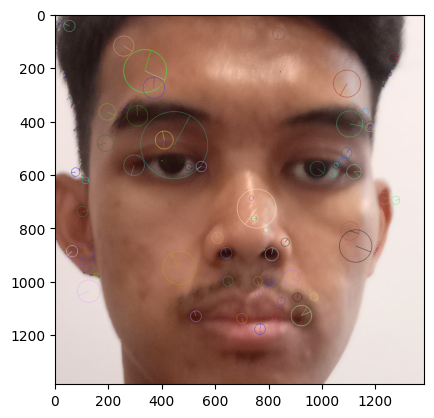

In [17]:
import cv2
import matplotlib.pyplot as plt
# Loading the image
img = cv2.imread('../dataset_CV/mahfud/IMG-20231101-WA0003.jpg')
status,haarnya=haar(img)
# Applying SIFT detector
sift = cv2.SIFT_create(500)
kpts, des = sift.detectAndCompute(haarnya, None)
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(haarnya, kpts , haarnya ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(f" jumlah keypoint terbentuk {len(kpts)}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
import numpy as np
#kmeans works only on float, so convert integers to float
descriptors_float = des.astype(float)
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq
k = 200 #dari total 500 diambil hanya 200
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)
# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((1, k), "float32")
for i in range(1):
    words, distance = vq(des,voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)
print(im_features)

(1, 200)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 4. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1.
  2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1.
  1. 2. 2. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
  1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1.
  1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 2. 1. 1. 1. 1. 1. 1.]]


In [20]:
#menentukan direktori/folder data citra yang akan dibuka
dirname = '../dataset_CV/'
#menentukan ukuran tinggi dan lebar gambar
height = 225
width = 225
dim = (width, height)
#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
sift = cv2.SIFT_create()
#mengumpulkan data citra yang akan dibuka dalam satu array
tampungan_data = []
tampungan_label = []
for path, subdirs, files in os.walk(dirname):
  print(path)
  for name in files:
      img_path = (os.path.join(path, name)) #baca path data
      if (img_path.endswith("jpg")): #dengan file berekstensi jpg
          img = cv2.imread(img_path) #baca gambar
          status, haarnya = haar(img)
          if(status):
              resized=cv2.resize(haarnya,dim, interpolation=cv2.INTER_LINEAR) #resize
              kpts, des = sift.detectAndCompute(resized, None)
              tampungan_data.append(des)

              path_parts = path.split('/')
              # Mengambil elemen terakhir dari path_parts sebagai kata terakhir
              last_word = path_parts[-1]
              #preprocessing data / segentasi boleh dilakukan disini
              tampungan_label.append(last_word)
  X = np.array(tampungan_data, dtype=object)
  y = np.array(tampungan_label)

../dataset_CV/
../dataset_CV/mahfud
../dataset_CV/siti
../dataset_CV/tomy


In [21]:
descriptors = None
for descriptor in X:
  if descriptors is None:
      descriptors = descriptor
  else:
      descriptors = np.vstack((descriptors, descriptor)) #gunakan untuk menggabungkan deskriptor menjadi satu tumpukan

#kmeans works only on float, so convert integers to float
descriptors_float = descriptors.astype(float)
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

k = 200 #k means with 100 clusters gives lower accuracy for the aeroplane example
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)

# Calculate the histogram of features and represent them as vector
# vq Assigns codes from a code book to observations.
im_features = np.zeros((len(y), k), "float32")
for i in range(len(y)):
    words, distance = vq(X[i],voc)
    for w in words:
        im_features[i][w] += 1
print(im_features.shape)


(476, 200)


{'mahfud': 0, 'siti': 1, 'tomy': 2} jumlah data: 476


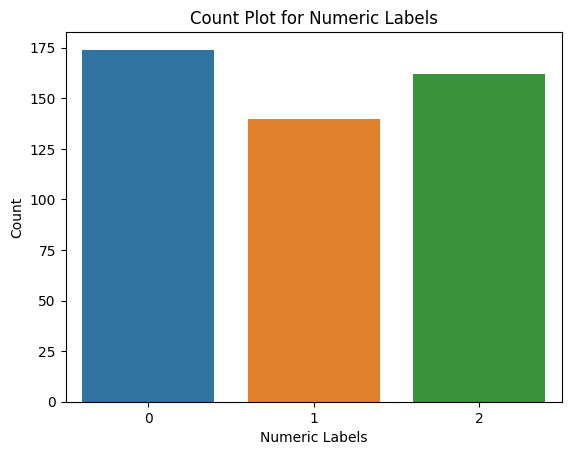

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
list_label=np.unique(y) #mendapatkan label unik
label_dict = {label: idx for idx, label in enumerate(list_label)} #masukkan dalam list
print(f"{label_dict} jumlah data: {len(y)}")
label_numerik = [label_dict[s] for s in y] #ubah kedalam numerik
label_numerik_array = np.array(label_numerik)
# Visualisasikan dalam jumlah dalam plot
sns.countplot(x=label_numerik_array)
plt.xlabel('Numeric Labels')
plt.ylabel('Count')
plt.title('Count Plot for Numeric Labels')
plt.show()
# simpan dalam file npy untuk labeling
np.save('weight/label_knn.npy', label_dict)


In [23]:
from sklearn.model_selection import train_test_split #library untuk train test split
#melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(im_features, label_numerik_array,test_size=0.20, stratify=label_numerik_array)
#train size adalah persentase data test yang di-split dengan proporsi label yang sama
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))

X_train: (380, 200)
X_test: (96, 200)
y_train: (380,)
y_test: (96,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
model = KNeighborsClassifier(n_neighbors=5, metric="minkowski") #knn dengan nilai n ditentukan
model.fit(X_train, y_train) #pastikan model di "fit" = proses latih


KNeighborsClassifier()

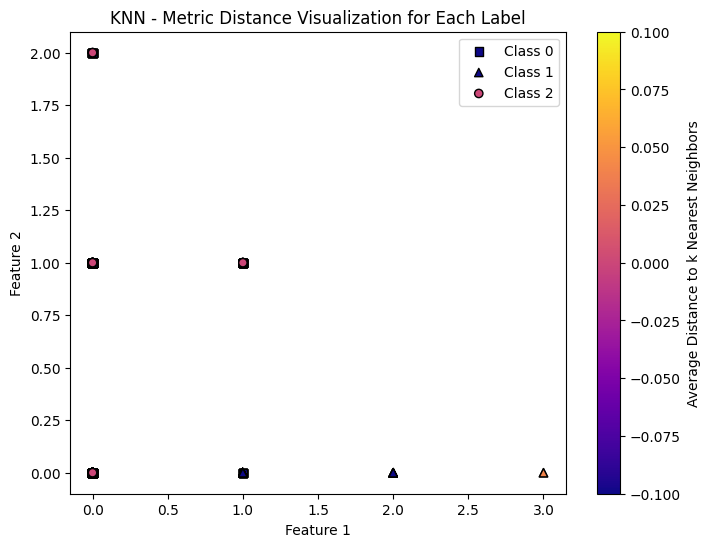

In [25]:
import matplotlib.pyplot as plt
# Visualize the metric distances for each label separately with different marker shapes
plt.figure(figsize=(8, 6))
distances, _ = model.kneighbors(X_train)
# Dictionary to map label to marker shape
marker_dict = {0: 's', 1: '^', 2: 'o'}
for label in np.unique(y_train):
  # Get the indices of data points belonging to the current label
  label_indices = np.where(y_train == label)[0]

  # Get the distances to the k nearest neighbors for data points of the current label
  label_distances = np.mean(distances[label_indices], axis=1)

  # Plot the distances for the current label with the corresponding marker shape
  plt.scatter(X_train[label_indices, 0], X_train[label_indices, 1], c=label_distances, cmap='plasma', edgecolors='k', label=f"Class {label}", marker=marker_dict[label])
plt.colorbar(label='Average Distance to k Nearest Neighbors')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN - Metric Distance Visualization for Each Label")
plt.legend()
plt.show()

In [26]:
y_pred = model.predict(X_test) #predict untuk memprediksi data test

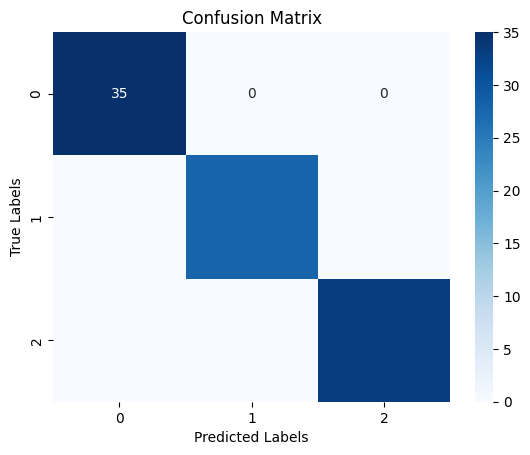

In [27]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [28]:
print(classification_report(y_test, y_pred)) #evaluasi hasil

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



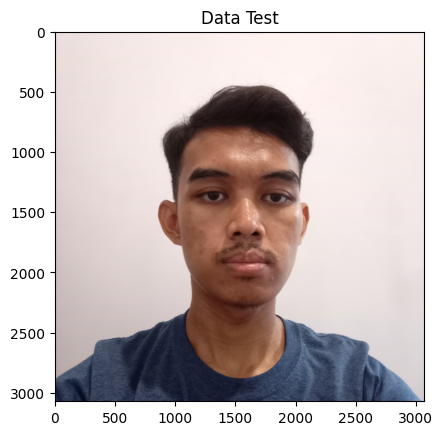

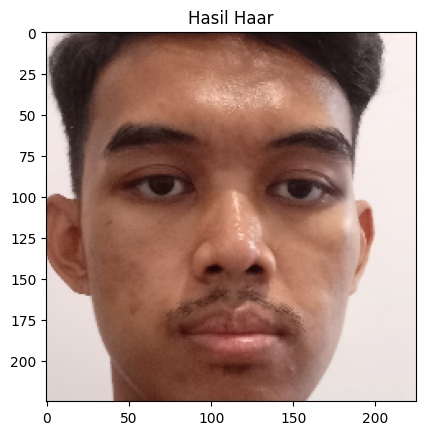

 jumlah keypoint terbentuk 211


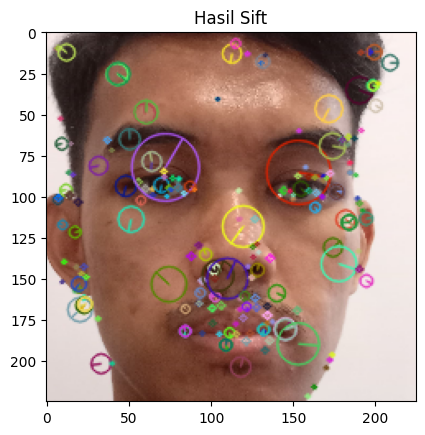

(1, 200)
ukuran data test (1, 200)
nilai probabilitas [[1. 0. 0.]]
mahfud = 100.0%
siti = 0.0%
tomy = 0.0%
prediksinya: ['mahfud']
The predicted image is : [0] -> ['mahfud']


In [30]:
import matplotlib.pyplot as plt
import cv2
import os
import os.path
import numpy as np
url= '../dataset_CV/mahfud/IMG-20231101-WA0005.jpg'
img=cv2.imread(url)
plt.figure()
plt.title("Data Test")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#pastikan langkah preprocessing yang dilakukan sama dengan data train
status,haarnya=haar(img)
img_resize = cv2.resize(haarnya,(225,225))
#tampilkan hasil
plt.figure()
plt.title("Hasil Haar")
plt.imshow(cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure()
plt.title("Hasil Sift")
# sift = cv2.SIFT_create()
sift = cv2.SIFT_create(nfeatures=500, nOctaveLayers=9, contrastThreshold=0.03, edgeThreshold=10, sigma=1.6)
kpts, des = sift.detectAndCompute(img_resize, None)
# Marking the keypoint on the image using circles
img=cv2.drawKeypoints(img_resize, kpts , img_resize ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
print(f" jumlah keypoint terbentuk {len(kpts)}")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# bovw
#kmeans works only on float, so convert integers to float
descriptors_float = des.astype(float)
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq
k = 200 #dari total 500 diambil hanya 200
voc, variance = kmeans(obs=descriptors_float, k_or_guess=k, iter=5)
# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((1, k), "float32")
for i in range(1):
    words, distance = vq(des,voc)
    for w in words:
       im_features[i][w] += 1
print(im_features.shape)
print(f"ukuran data test {im_features.shape}") #sama dengan input shape
# Mengecek hasil klasifikasi pada salah satu dataset
probability=model.predict_proba(im_features)
print(f"nilai probabilitas {probability}") #tampilkan nilai probabilitas tiap kelas
for ind,val in enumerate(label_dict): #mendapatkan nama kelas dan hasil akurasi
    print(f'{val} = {probability[0][ind]*100}%')


hasil = np.argmax(probability, axis=-1) #mendapatkan kelas dari probabilitas terbaik
key_found = [key for key, value in label_dict.items() if value == hasil] #dapatkan namanya
print(f"prediksinya: {key_found}")
print(f"The predicted image is : {str(hasil)} -> {key_found}")